# Hyperparameter `pident_thresh` analysis

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
RESDIRBASE = "out"

PIDENT_VALUES = np.sort(np.concatenate([
    np.arange(25, 90, 5),
    np.arange(86, 91)
]))
print(PIDENT_VALUES
      )
OUTDIR = "out/pident_thresh_analysis"
IMGDIR = f"{OUTDIR}/images"

os.makedirs(OUTDIR, exist_ok=True)
os.makedirs(IMGDIR, exist_ok=True)

[25 30 35 40 45 50 55 60 65 70 75 80 85 86 87 88 89 90]


In [3]:
KO_INFO_FPATH = "data/ko_information.tsv"
DF_KO_INFO = pd.read_csv(
    KO_INFO_FPATH, sep="\t", index_col=0
)

def _mapfunc(s):
    s = s.lower()
    if "nitrate reductase" in s:
        return "nitrate reductase"
    elif "nitrite reductase" in s:
        return "nitrite reductase"
    elif "nitric oxide reductase" in s:
        return "nitric oxide reductase"
    elif "nitrous oxide reductase" in s or "nitrous-oxide reductase" in s:
        return "nitrous oxide reductase"
    elif "hydroxylamine reductase" in s:
        return "hydroxylamine reductase"
    else:
        return "other"
    
DF_KO_INFO["category"] = DF_KO_INFO["NAME"].apply(_mapfunc)

KO_LIST = list(DF_KO_INFO.index)

DF_KO_INFO

,SYMBOL,NAME,category
ENTRY,,,
K00360,nasB,assimilatory nitrate reductase electron transf...,nitrate reductase
K00361,nasB,nitrite reductase [NAD(P)H] [EC:1.7.1.4],nitrite reductase
K00362,nirB,nitrite reductase (NADH) large subunit [EC:1.7...,nitrite reductase
K00363,nirD,nitrite reductase (NADH) small subunit [EC:1.7...,nitrite reductase
K00366,nirA,ferredoxin-nitrite reductase [EC:1.7.7.1],nitrite reductase
K00367,narB,ferredoxin-nitrate reductase [EC:1.7.7.2],nitrate reductase
K00368,nirK,nitrite reductase (NO-forming) [EC:1.7.2.1],nitrite reductase
K00370,"narG, narZ, nxrA","nitrate reductase / nitrite oxidoreductase, al...",nitrate reductase
K00371,"narH, narY, nxrB","nitrate reductase / nitrite oxidoreductase, be...",nitrate reductase


In [4]:
TAXA_INFO_FPATH = "data/taxid_to_scaffold.csv"

TAXA_DF = pd.read_csv(TAXA_INFO_FPATH, index_col=0)
TAXA_LIST = list(TAXA_DF[~pd.isna(TAXA_DF.index)].index.values)

TAXA_DF


,species
taxid,
1,Lee_A8Q_1_Ecoli_contig_1_polypolish
2849180,Parabacteroides_sp._MSK.9.14
10710,NaN
305,Ralstonia_solanacearum_strain_KACC_10722
1280,CP013959.1_Staphylococcus_aureus_strain_V605
511145,NaN
190485,NC_003902.1_Xanthomonas_campestris_pv._campest...
267608,NC_003295.1_Ralstonia_solanacearum_GMI1000
216595,NC_012660.1_Pseudomonas_fluorescens_SBW25


In [5]:
pident_to_df = {}
for pi_idx, pi in enumerate(PIDENT_VALUES):
    fpath = f"{RESDIRBASE}/res_pident{pi}/dmnd_combined_top_hits.tsv"
    df = pd.read_csv(
        fpath, sep='\t'
    )
    pident_to_df[pi] = df


In [6]:
pident_to_df[65]

,taxid,ko,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
0,1114970,K02305,pfe:PSF113_3758,WP_003202495.1,100.0,146,0,0,1,146,1,146,6.500000e-112,311.0
1,1114970,K04561,psil:PMA3_13920,WP_013692871.1,98.0,456,8,1,1,456,1,455,0.000000e+00,908.0
2,1114970,K00376,pza:HU749_012250,WP_013692874.1,90.1,645,64,0,1,645,1,645,0.000000e+00,1214.0
3,1114970,K00366,nop:Nos7524_1864,WP_014336374.1,72.6,208,57,0,500,707,1,208,2.580000e-94,288.0
4,1114970,K00372,pfe:PSF113_1771,WP_014337335.1,100.0,905,0,0,1,905,1,905,0.000000e+00,1824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,348824,K00372,rhl:LPU83_3527,WP_024318262.1,100.0,885,0,0,1,885,1,885,0.000000e+00,1785.0
293,348824,K02568,rhl:LPU83_pLPU83d1343,WP_037071157.1,100.0,151,0,0,1,151,17,167,3.220000e-109,305.0
294,348824,K02567,emx:FKV68_33420,WP_040680965.1,91.6,835,70,0,1,835,1,835,0.000000e+00,1597.0
295,745310,K04561,nor:FA702_22520,WP_015449316.1,99.6,755,3,0,1,755,1,755,0.000000e+00,1512.0


In [7]:
hit_counts_by_pident = {}
for pi in PIDENT_VALUES:
    df = pident_to_df[pi]
    hit_counts = df.groupby(["taxid", "ko"])["sseqid"].count()
    hit_counts_by_pident[pi] = hit_counts

In [8]:
hit_counts_by_pident[50]

df_counts = hit_counts_by_pident[50].reset_index(name="count")
df_matrix = df_counts.pivot(index="taxid", columns="ko", values="count").fillna(0).astype(int)
df_matrix

ko,K00360,K00361,K00362,K00363,K00366,K00368,K00370,K00371,K00372,K00373,...,K04748,K05601,K12264,K12265,K12266,K15864,K15876,K19339,K26138,K26139
taxid,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,0,0,2,2,0,2,...,0,1,1,1,8,0,1,0,0,0
305,0,0,1,1,1,2,1,1,1,1,...,0,0,1,0,8,0,0,0,0,1
470,1,0,1,0,0,0,0,0,2,0,...,0,1,0,0,3,0,0,0,1,1
1280,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,1
68895,0,0,1,1,1,1,2,2,1,2,...,0,1,4,0,10,1,0,0,1,1
80878,0,0,1,1,0,0,1,1,0,1,...,1,0,1,0,5,1,0,1,0,0
176279,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,1
190485,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,4,0,0,0,1,1
198214,0,0,1,1,0,0,1,2,0,1,...,0,1,1,1,5,0,1,0,0,0


In [9]:
count_matrix_by_pident = {}
for pi in PIDENT_VALUES:
    df_counts = hit_counts_by_pident[pi].reset_index(name="count")
    df_matrix = df_counts.pivot(index="taxid", columns="ko", values="count").fillna(0).astype(int)
    count_matrix_by_pident[pi] = df_matrix
    

In [10]:
for df in count_matrix_by_pident.values():
    print(len(df))

32
32
32
32
32
32
32
32
31
31
31
31
31
31
31
31
30
30


In [11]:
TAXA_DF

,species
taxid,
1,Lee_A8Q_1_Ecoli_contig_1_polypolish
2849180,Parabacteroides_sp._MSK.9.14
10710,NaN
305,Ralstonia_solanacearum_strain_KACC_10722
1280,CP013959.1_Staphylococcus_aureus_strain_V605
511145,NaN
190485,NC_003902.1_Xanthomonas_campestris_pv._campest...
267608,NC_003295.1_Ralstonia_solanacearum_GMI1000
216595,NC_012660.1_Pseudomonas_fluorescens_SBW25


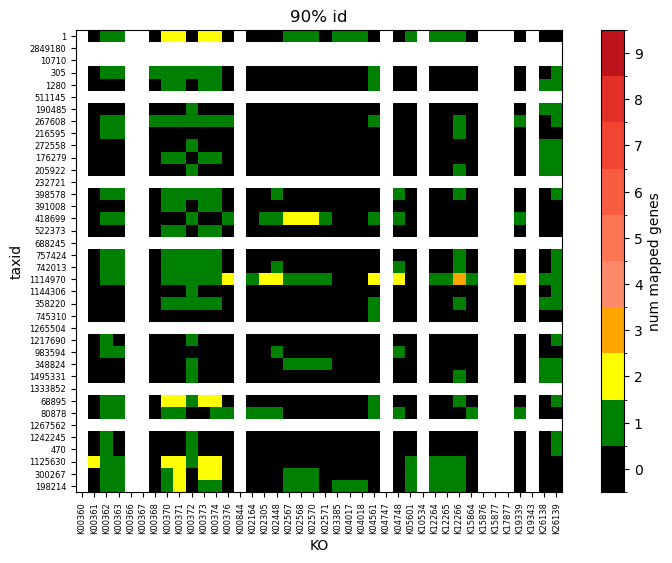

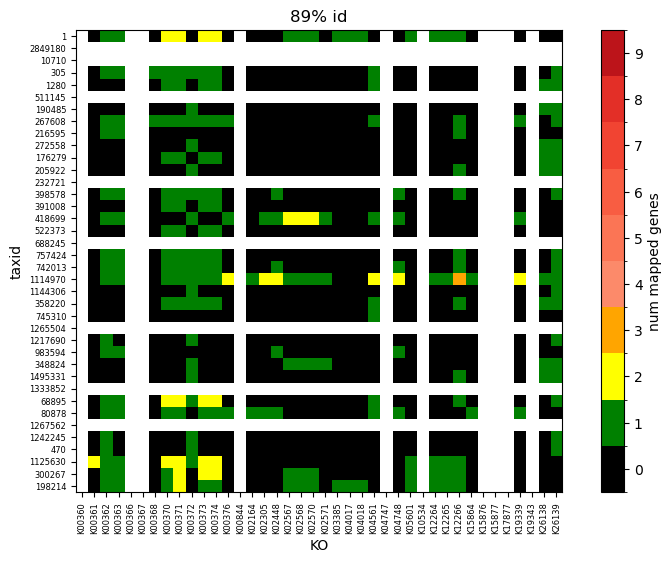

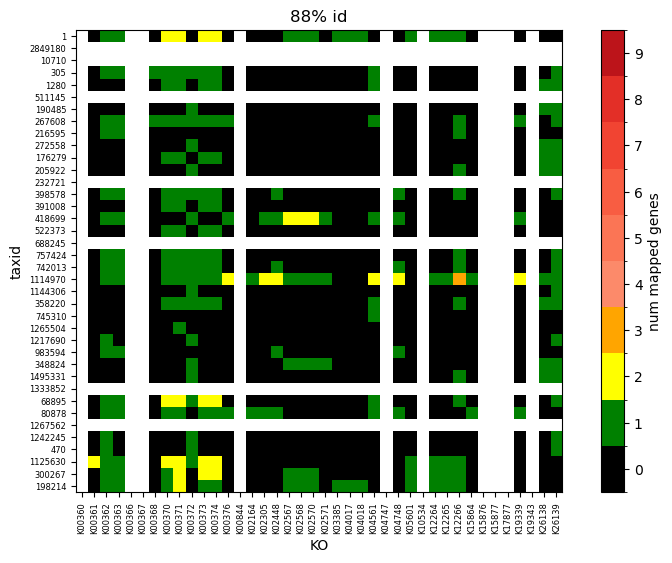

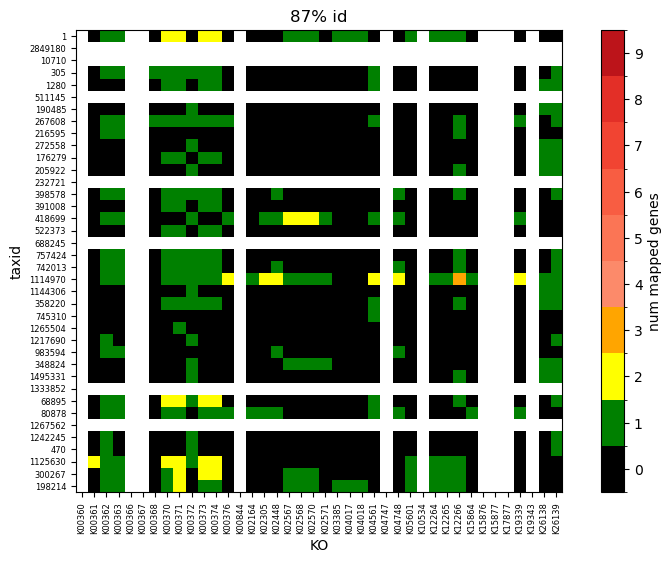

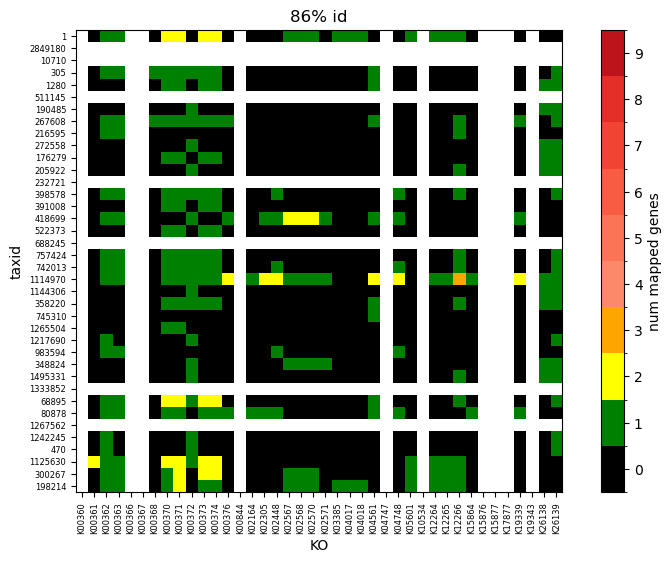

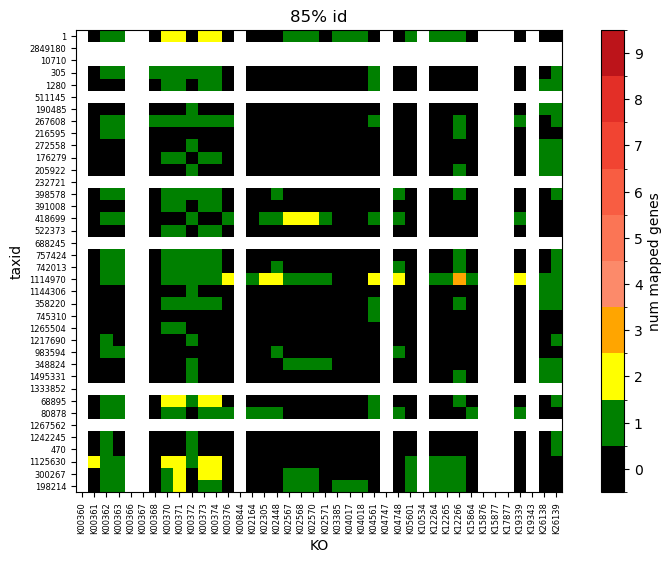

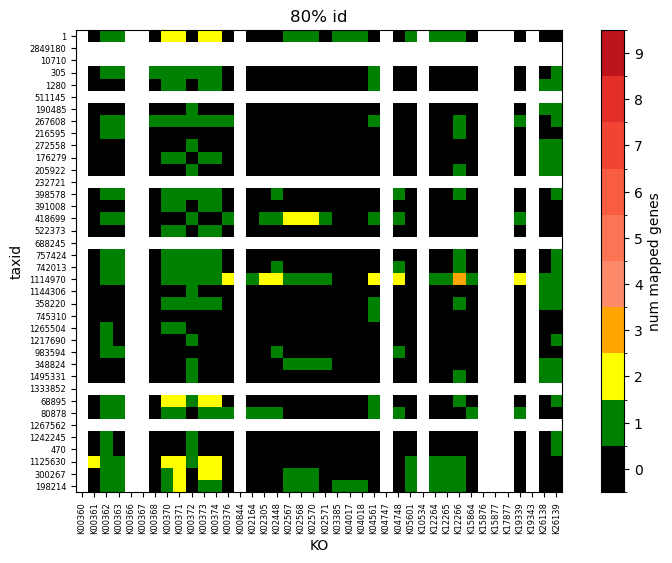

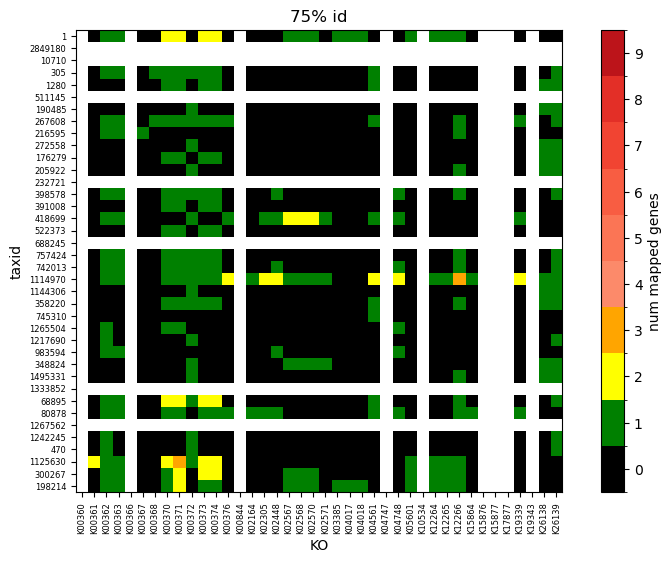

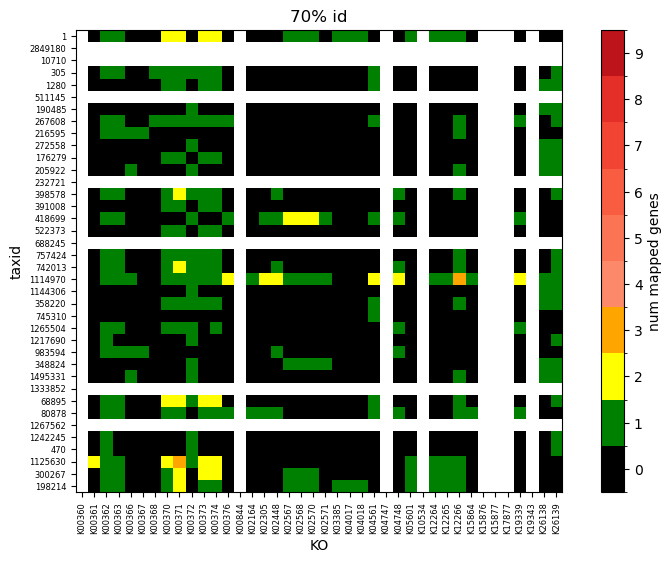

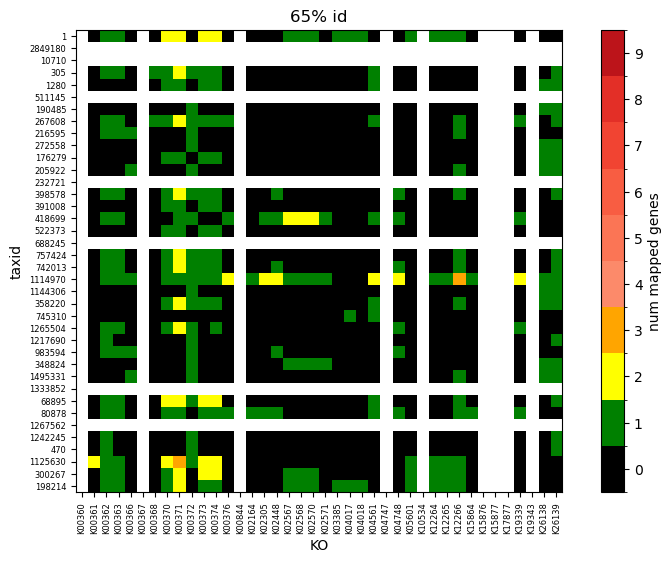

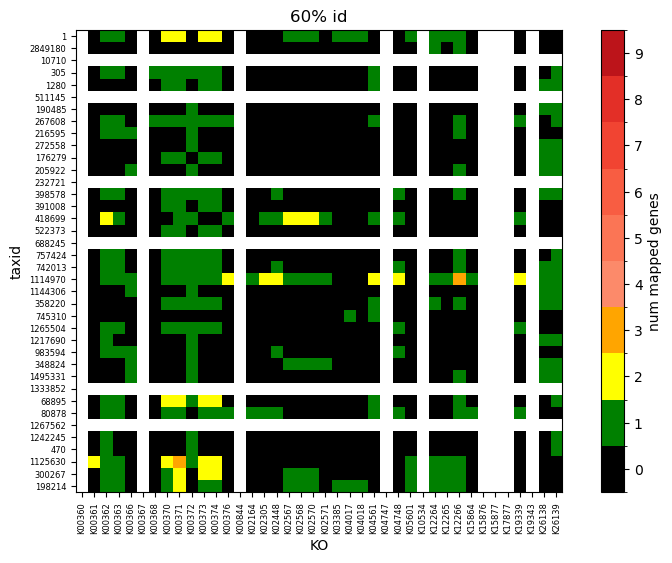

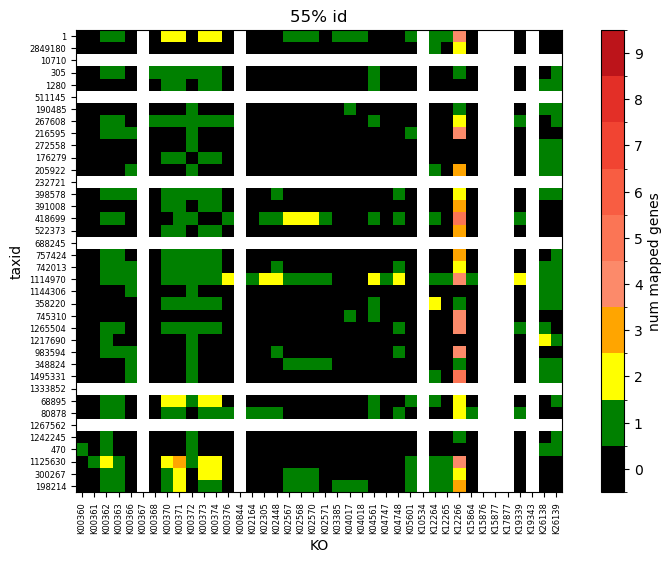

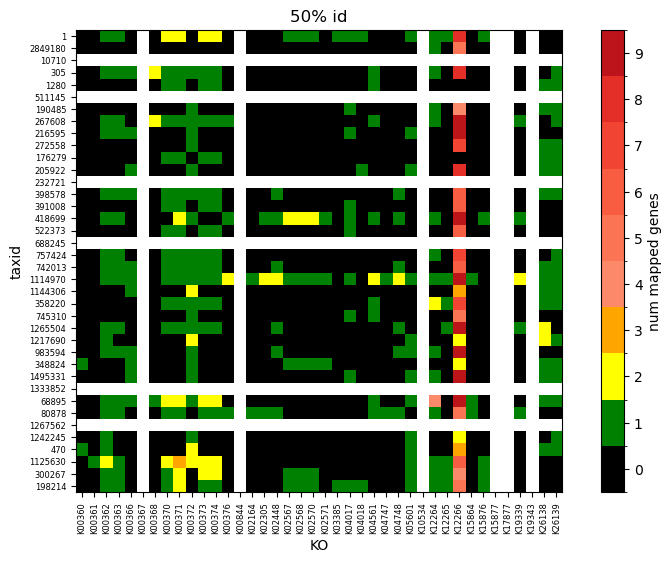

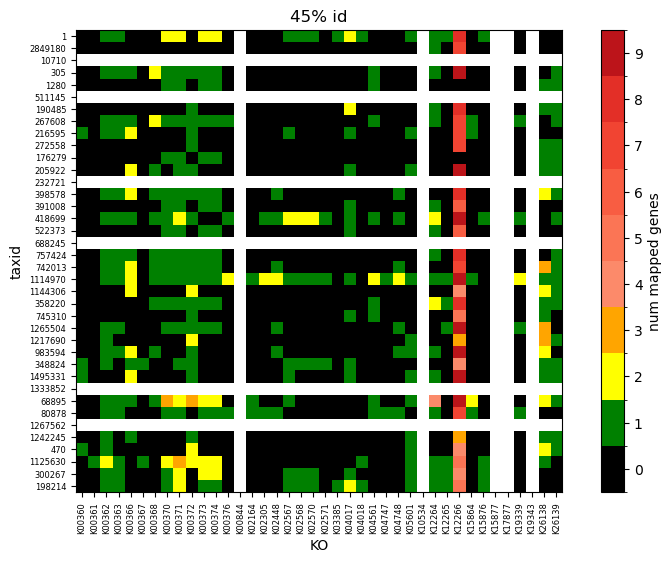

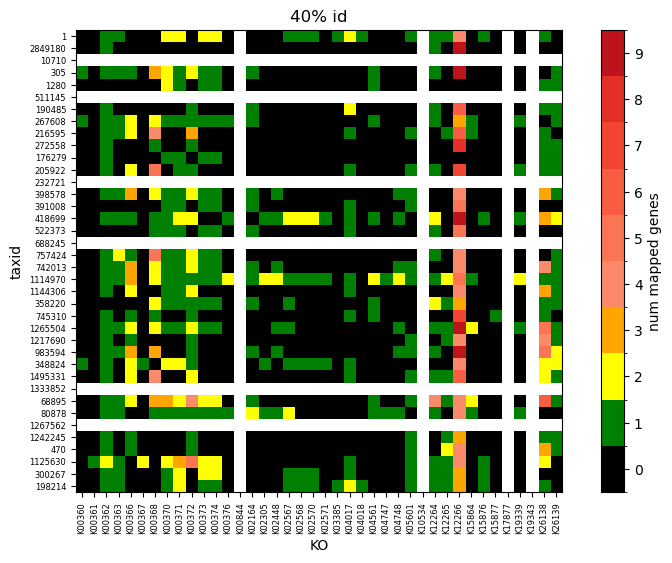

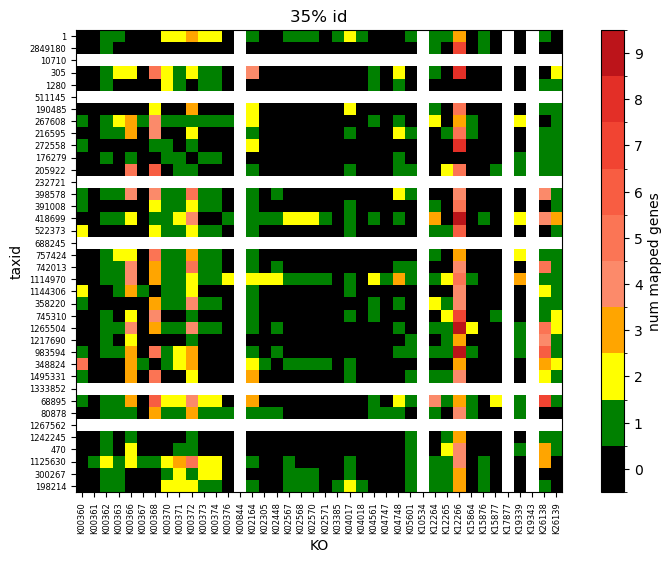

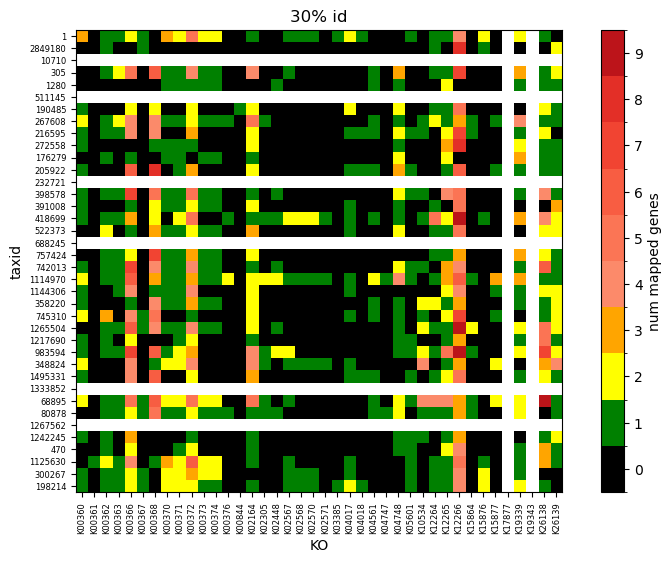

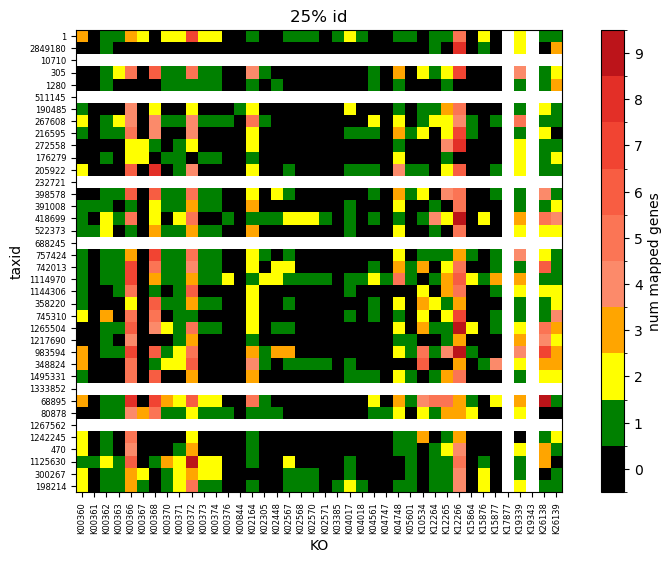

In [12]:
num_taxa = len(TAXA_LIST)
num_kos = len(KO_LIST)

# Define custom colors:
# 0=black, 1=green, 2=yellow, 3=orange, 4–10=reds
colors = [
    "black",    # 0
    "green",    # 1
    "yellow",   # 2
    "orange",   # 3
    *plt.cm.Reds(np.linspace(0.4, 0.8, 7))  # 4,5,6,7,8 (shades of red)
]

# Colormap + normalization
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(boundaries=range(len(colors)), ncolors=cmap.N)


prev_values = None
best_counts = np.nan * np.ones([num_taxa, num_kos], dtype=float)
best_pident = np.nan * np.ones([num_taxa, num_kos], dtype=float)

for pi in np.flip(np.sort(PIDENT_VALUES)):

    fig, ax = plt.subplots(figsize=(10, 6))

    df_matrix = count_matrix_by_pident[pi]
    counts = -1 * np.ones([num_taxa, num_kos], dtype=float)
    for taxa_idx, taxid in enumerate(TAXA_LIST):
        for ko_idx, ko in enumerate(KO_LIST):
            if taxid in df_matrix.index and ko in df_matrix.columns:
                counts[taxa_idx, ko_idx] = df_matrix.loc[taxid, ko]
            else:
                counts[taxa_idx, ko_idx] = np.nan

    cax = ax.matshow(counts, cmap=cmap, norm=norm, )

    cbar = fig.colorbar(
        cax, ax=ax, 
        ticks=np.arange(0.5, len(colors)), 
        label="num mapped genes"
    )
    cbar.set_ticklabels(range(len(colors)))
    
    ax.set_xlabel("KO")
    ax.set_ylabel("taxid")
    ax.set_title(f"{pi}% id")

    ax.xaxis.set_ticks_position("bottom")
    ax.set_xticks(range(num_kos))
    ax.set_xticklabels(KO_LIST, rotation=90, fontsize=6)
    
    ax.set_yticks(range(num_taxa))
    ax.set_yticklabels(TAXA_LIST, fontsize=6)
    
    plt.savefig(f"{IMGDIR}/num_mapped_genes_{pi}.png")

    # Update values
    if prev_values is None:
        screen = ~np.isnan(counts) & (counts > 0)
        best_counts[screen] = counts[screen]
        best_pident[screen] = pi
    else:
        screen = ~np.isnan(counts) & (np.isnan(best_counts) | (best_counts == 0))
        best_counts = np.where(screen, counts, best_counts)
        best_pident = np.where(screen, pi, best_pident)
    prev_values = counts


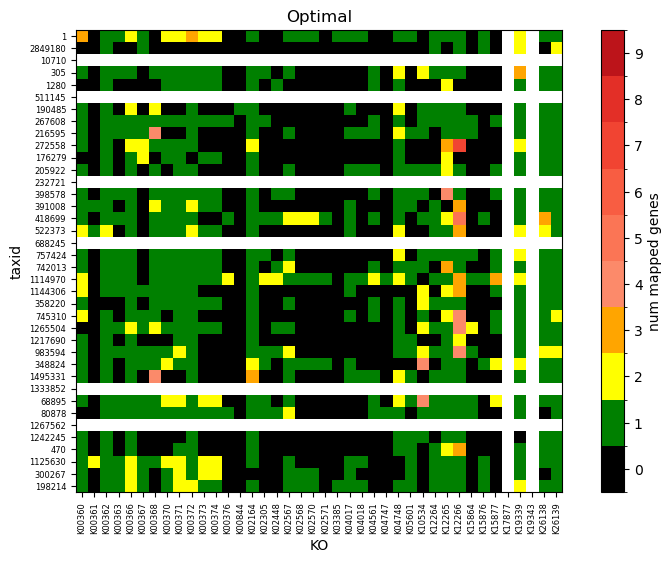

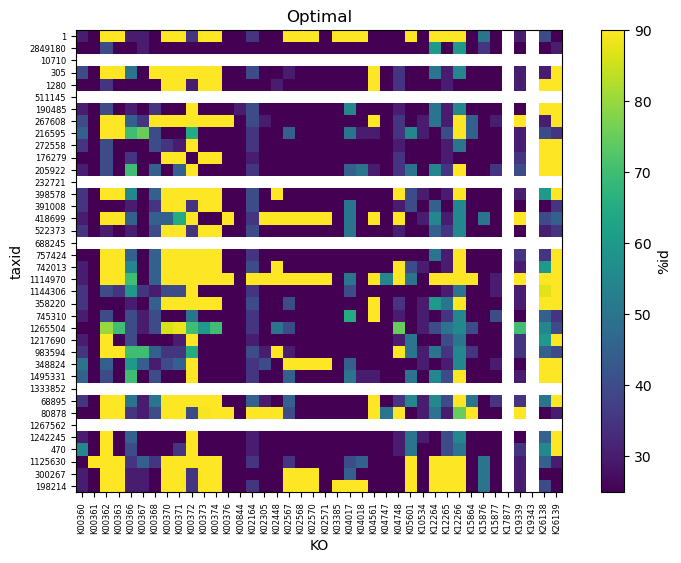

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

cax = ax.matshow(best_counts, cmap=cmap, norm=norm, )

cbar = fig.colorbar(
    cax, ax=ax, 
    ticks=np.arange(0.5, len(colors)), 
    label="num mapped genes"
)
cbar.set_ticklabels(range(len(colors)))

ax.set_xlabel("KO")
ax.set_ylabel("taxid")
ax.set_title("Optimal")

ax.xaxis.set_ticks_position("bottom")
ax.set_xticks(range(num_kos))
ax.set_xticklabels(KO_LIST, rotation=90, fontsize=6)

ax.set_yticks(range(num_taxa))
ax.set_yticklabels(TAXA_LIST, fontsize=6)

plt.savefig(f"{IMGDIR}/optimal_counts.png")



fig, ax = plt.subplots(figsize=(10, 6))

cax = ax.matshow(best_pident, cmap="viridis")

cbar = fig.colorbar(
    cax, ax=ax, 
    label="%id"
)
# cbar.set_ticklabels(range(len(colors)))

ax.set_xlabel("KO")
ax.set_ylabel("taxid")
ax.set_title("Optimal")

ax.xaxis.set_ticks_position("bottom")
ax.set_xticks(range(num_kos))
ax.set_xticklabels(KO_LIST, rotation=90, fontsize=6)

ax.set_yticks(range(num_taxa))
ax.set_yticklabels(TAXA_LIST, fontsize=6)

plt.savefig(f"{IMGDIR}/optimal_pident.png")

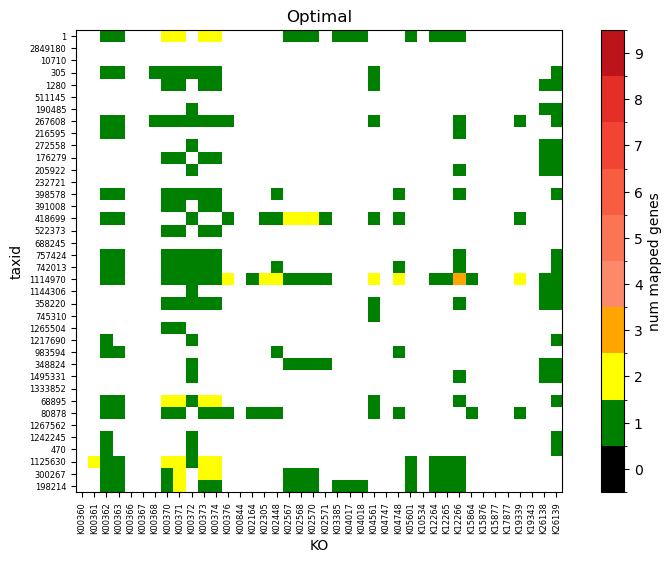

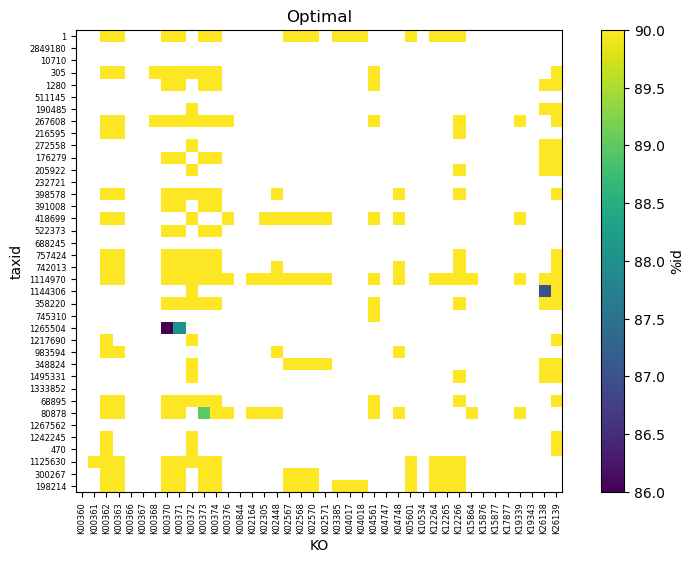

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

PI_THRESH = 85

thresholded_counts = np.where(best_pident > PI_THRESH, best_counts, np.nan)
thresholded_pident = np.where(best_pident > PI_THRESH, best_pident, np.nan)

cax = ax.matshow(
    thresholded_counts,
    cmap=cmap, norm=norm,
)

cbar = fig.colorbar(
    cax, ax=ax, 
    ticks=np.arange(0.5, len(colors)), 
    label="num mapped genes"
)
cbar.set_ticklabels(range(len(colors)))

ax.set_xlabel("KO")
ax.set_ylabel("taxid")
ax.set_title("Optimal")

ax.xaxis.set_ticks_position("bottom")
ax.set_xticks(range(num_kos))
ax.set_xticklabels(KO_LIST, rotation=90, fontsize=6)

ax.set_yticks(range(num_taxa))
ax.set_yticklabels(TAXA_LIST, fontsize=6);



fig, ax = plt.subplots(figsize=(10, 6))

cax = ax.matshow(thresholded_pident, cmap="viridis")

cbar = fig.colorbar(
    cax, ax=ax, 
    label="%id"
)
# cbar.set_ticklabels(range(len(colors)))

ax.set_xlabel("KO")
ax.set_ylabel("taxid")
ax.set_title("Optimal")

ax.xaxis.set_ticks_position("bottom")
ax.set_xticks(range(num_kos))
ax.set_xticklabels(KO_LIST, rotation=90, fontsize=6)

ax.set_yticks(range(num_taxa))
ax.set_yticklabels(TAXA_LIST, fontsize=6);


In [15]:
taxid_to_ko_counts = {}
ko_to_taxid_counts = {}
taxid_to_ko_read_stealers = {}
ko_to_taxid_read_stealers = {}
read_stealers = []
for taxa_idx, taxid in enumerate(TAXA_LIST):
    taxid = int(taxid)
    taxid_to_ko_counts[taxid] = {}
    taxid_to_ko_read_stealers[taxid] = {}
    for ko_idx, ko in enumerate(KO_LIST):
        if ko not in ko_to_taxid_counts:
            ko_to_taxid_counts[ko] = {}
        if ko not in ko_to_taxid_read_stealers:
            ko_to_taxid_read_stealers[ko] = {}

        cnt = thresholded_counts[taxa_idx, ko_idx]
        pi = thresholded_pident[taxa_idx, ko_idx]
        if not np.isnan(cnt):
            taxid_to_ko_counts[taxid][ko] = int(cnt)
            ko_to_taxid_counts[ko][taxid] = int(cnt)
            df = pident_to_df[pi]
            df = df[(df["taxid"] == taxid) & (df["ko"] == ko)]

            taxid_to_ko_read_stealers[taxid][ko] = df
            ko_to_taxid_read_stealers[ko][taxid] = df
            read_stealers.append(df)

read_stealers = pd.concat(read_stealers, axis=0)
            

In [16]:
taxid_to_ko_counts[1]

{'K00362': 1,
 'K00363': 1,
 'K00370': 2,
 'K00371': 2,
 'K00373': 2,
 'K00374': 2,
 'K02567': 1,
 'K02568': 1,
 'K02570': 1,
 'K03385': 1,
 'K04017': 1,
 'K04018': 1,
 'K05601': 1,
 'K12264': 1,
 'K12265': 1,
 'K12266': 1}

In [17]:
ko_to_taxid_counts["K00370"]

{1: 2,
 305: 1,
 1280: 1,
 267608: 1,
 176279: 1,
 398578: 1,
 391008: 1,
 522373: 1,
 757424: 1,
 742013: 1,
 1114970: 1,
 358220: 1,
 1265504: 1,
 68895: 2,
 80878: 1,
 1125630: 2,
 300267: 1,
 198214: 1}

In [18]:
read_stealers

,taxid,ko,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
73,1,K00362,esa:ESA_04368,EHHOFP_03745,92.2,846,65,1,1,846,1,845,0.000000e+00,1592
72,1,K00363,sty:STY4321,EHHOFP_03740,93.5,108,7,0,1,108,1,108,2.420000e-73,210
80,1,K00370,ecos:EC958_1735,EHHOFP_13480,99.3,1246,9,0,42,1287,1,1246,0.000000e+00,2599
87,1,K00370,enf:AKI40_3370,EHHOFP_14645,92.8,1247,90,0,30,1276,1,1247,0.000000e+00,2459
81,1,K00371,elp:P12B_c1661,EHHOFP_13485,98.1,513,10,0,1,513,1,513,0.000000e+00,1058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,198214,K04018,ecv:APECO1_2380,NP_709852.1,98.5,198,3,0,23,220,1,198,1.250000e-135,375
55,198214,K05601,kpa:KPNJ1_03616,NP_706754.3,94.5,550,30,0,20,569,3,552,0.000000e+00,1061
65,198214,K12264,kva:Kvar_1025,NP_708517.1,90.7,484,40,1,1,484,1,479,0.000000e+00,909
66,198214,K12265,eco:b2711,NP_708518.1,96.8,377,12,0,1,377,1,377,8.420000e-261,706


In [19]:
read_stealers.to_csv("read_stealers.tsv", sep="\t", index=None)

In [20]:
OUT_PI_FPATH = "pident_values.tsv"

output_pident_values = np.where(
    np.isnan(thresholded_pident), PI_THRESH, thresholded_pident
)

rows = []
for taxa_idx, taxid in enumerate(TAXA_LIST):
    taxid = int(taxid)
    for ko_idx, ko in enumerate(KO_LIST):
        pi = output_pident_values[taxa_idx, ko_idx]
        rows.append([str(taxid), ko, str(pi)])

print(rows)
with open(OUT_PI_FPATH, "w") as f:
    f.writelines([" ".join(r) + "\n" for r in rows])



[['1', 'K00360', '85.0'], ['1', 'K00361', '85.0'], ['1', 'K00362', '90.0'], ['1', 'K00363', '90.0'], ['1', 'K00366', '85.0'], ['1', 'K00367', '85.0'], ['1', 'K00368', '85.0'], ['1', 'K00370', '90.0'], ['1', 'K00371', '90.0'], ['1', 'K00372', '85.0'], ['1', 'K00373', '90.0'], ['1', 'K00374', '90.0'], ['1', 'K00376', '85.0'], ['1', 'K00844', '85.0'], ['1', 'K02164', '85.0'], ['1', 'K02305', '85.0'], ['1', 'K02448', '85.0'], ['1', 'K02567', '90.0'], ['1', 'K02568', '90.0'], ['1', 'K02570', '90.0'], ['1', 'K02571', '85.0'], ['1', 'K03385', '90.0'], ['1', 'K04017', '90.0'], ['1', 'K04018', '90.0'], ['1', 'K04561', '85.0'], ['1', 'K04747', '85.0'], ['1', 'K04748', '85.0'], ['1', 'K05601', '90.0'], ['1', 'K10534', '85.0'], ['1', 'K12264', '90.0'], ['1', 'K12265', '90.0'], ['1', 'K12266', '90.0'], ['1', 'K15864', '85.0'], ['1', 'K15876', '85.0'], ['1', 'K15877', '85.0'], ['1', 'K17877', '85.0'], ['1', 'K19339', '85.0'], ['1', 'K19343', '85.0'], ['1', 'K26138', '85.0'], ['1', 'K26139', '85.0'],